# NLP: SENTIMENT ANALYSIS OF AMAZON ECHO REVIEWS
as part of Coursera Guided Project 'NLP:Twitter Sentiment Analysis' taught by professor Ryan Ahmed

***My first project using Python. Karina Barambayeva. Oct 19, 2022***

### Goal: 
* Build, train, test and deploy an Artificial intelligence (AI) model to predict sentiment from real Amazon Alexa customer reviews. 

### Tool:
* Anaconda, Python, Scikit-Learn, Matplotlib, Seaborn

### Practical real-world application: 
* AI/ML-based sentiment analysis is crucial for companies to automatically predict whether their customers are happy or not. The process could be done automatically without having humans manually review thousands of customer reviews.

### Data: 
* Input: Amazon Alexa Reviews
* Output: Sentiment (0 or 1)

Data Source: https://kaggle.com/datasets/sid321axn/amazon-alexa-reviews


## PROJECT TASKS: 
* Import the 'Amazon Reviews' dataset;
* Perform an Exploratory data analysis (EDA);
* Plot the word cloud for the reviews;
* Create a pipeline to conduct data cleaning;
* Train multiple models using Scikit Learn & assess trained models performance.


## IMPORT DATA AND PERFORM EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context = 'notebook', ticks = True, grid = False)
# setting the style of the notebook to be monokai

In [2]:
#Load the data
reviews_df = pd.read_csv('C:/Users/Karina/Documents/amazon_alexa.tsv', sep='\t')

In [3]:
# View the dataframe information
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [4]:
# View the dataframe statistical summary 
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


<AxesSubplot:xlabel='rating', ylabel='count'>

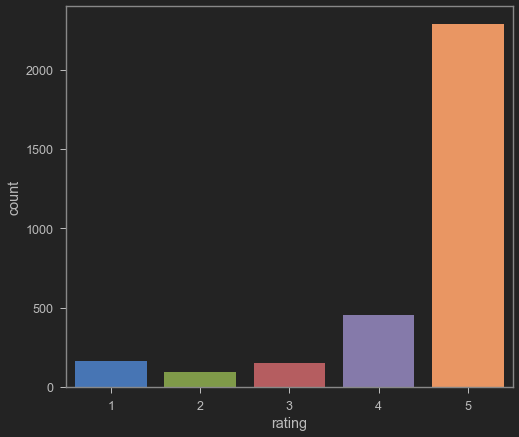

In [5]:
# Plot the count plot for the ratings 
sns.countplot(x = reviews_df['rating'])

<AxesSubplot:xlabel='feedback', ylabel='count'>

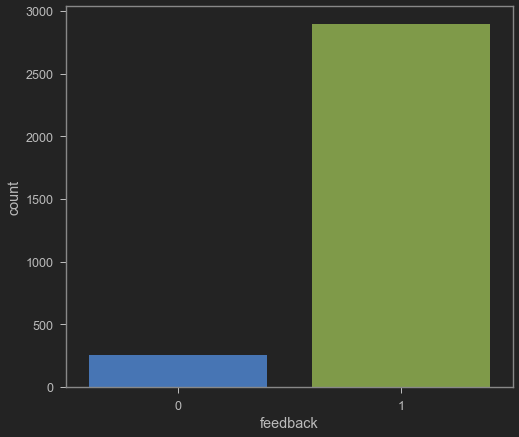

In [6]:
# Plot the count plot for the feedback 
sns.countplot(x = reviews_df['feedback'])

In [7]:
# Get the length of the verified_reviews column
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)

In [8]:
# Check out if the new column is in place 
reviews_df

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [9]:
# Get statistical summary to explore the length column 
reviews_df.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049524
std,1.068506,0.273778,182.099952
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


<AxesSubplot:ylabel='Frequency'>

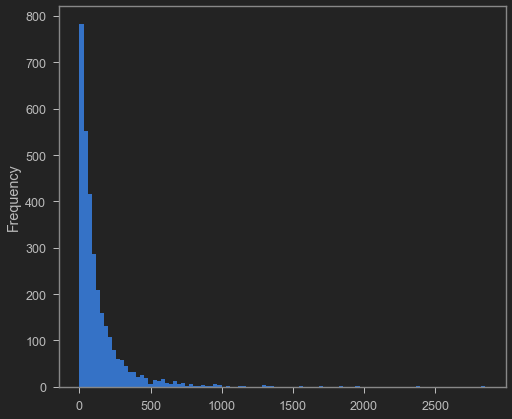

In [10]:
# Plot the histogram for the length column
reviews_df['length'].plot(bins=100, kind = 'hist')

## PLOT THE WORD CLOUD FOR POSITIVE, NEGATIVE & ALL REVIEWS

In [11]:
# Obtain positive reviews only 
positive_reviews = reviews_df[reviews_df['feedback'] == 1]
positive_reviews

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [12]:
# Obtain negative reviews only
negative_reviews = reviews_df[reviews_df['feedback'] == 0]
negative_reviews

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


In [13]:
# Convert positive reviews to list format
positive_sentences = positive_reviews['verified_reviews'].tolist()
len(positive_sentences)

2893

In [14]:
# Join positive reviews into one string
positive_sentences_as_one_string = " ".join(positive_sentences)
positive_sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

#### *Positive Reviews' Word Cloud:*

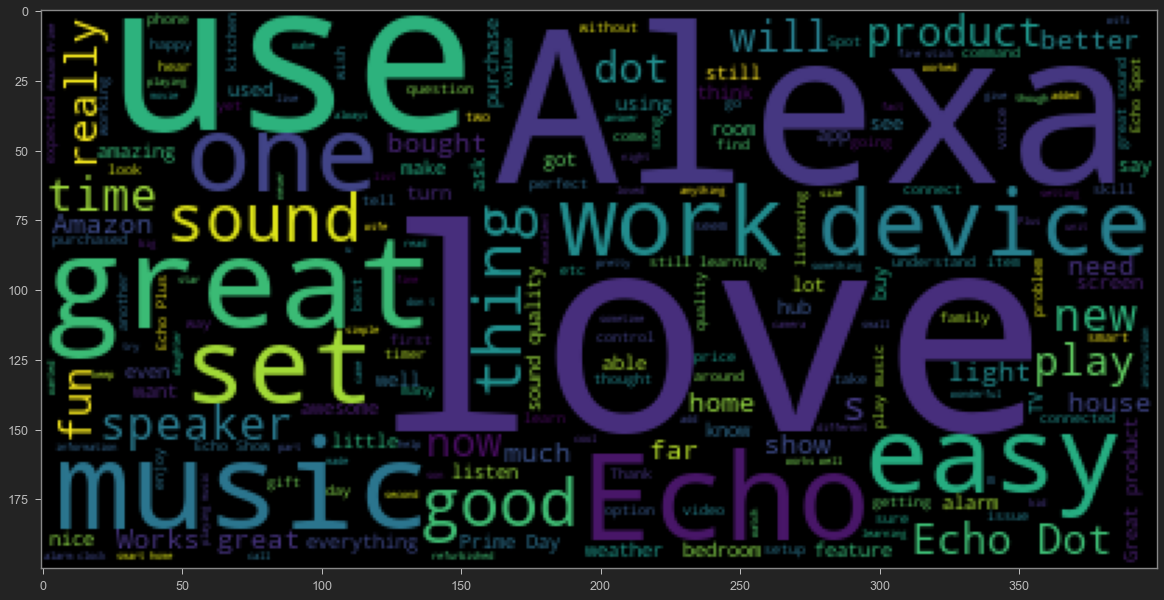

In [15]:
# Plot the wordcloud for positive reviews
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(positive_sentences_as_one_string))

#### *Negative Reviews' Word Cloud:*

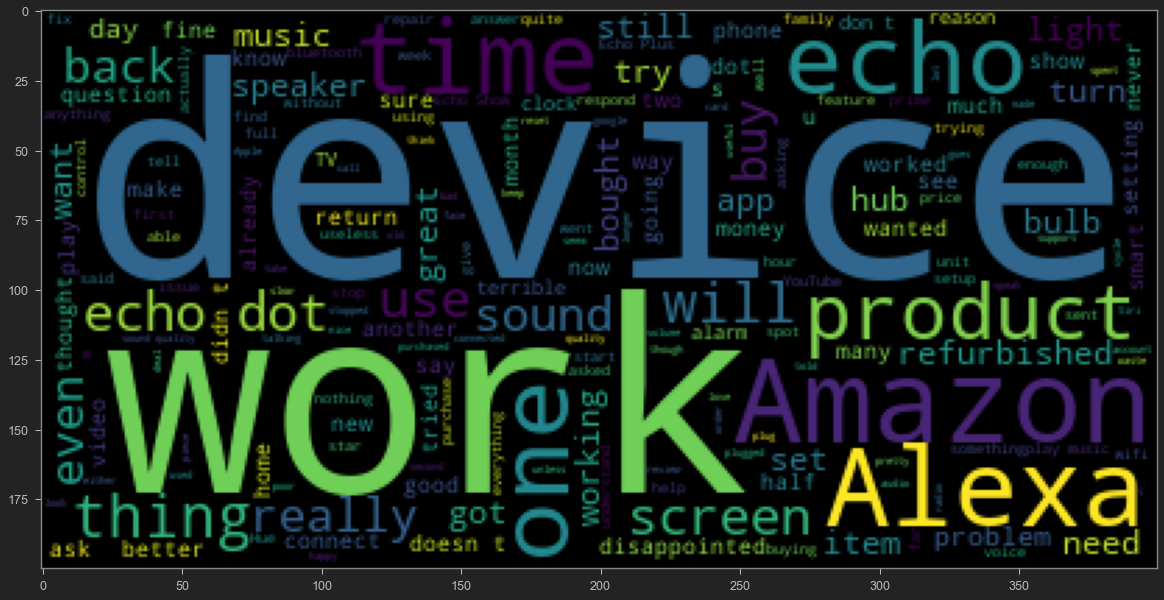

In [16]:
# Convert negative reviews to list, join into one string and plot the word cloud
negative_sentences = negative_reviews['verified_reviews'].tolist()
negative_sentences_as_one_string = " ".join(negative_sentences)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))


#### *All Reviews' Word Cloud:*

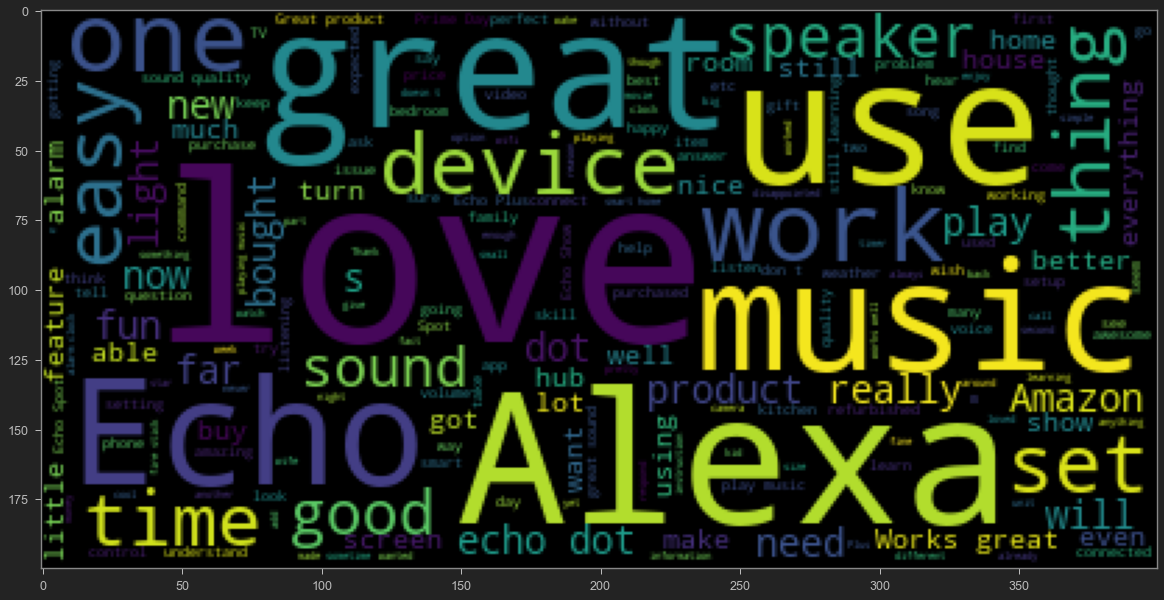

In [17]:
# Convert all reviews to list, join into one string and plot the word cloud
sentences = reviews_df['verified_reviews'].tolist()
sentences_as_one_string = " ".join(sentences)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

### DATA CLEANING

In [18]:
import string

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# Define a pipeline to clean up the reviews column
# The pipeline first removes punctuation, then removes stopwords
def message_cleaning(message):
    punc_removed = [char for char in message if char not in string.punctuation]
    punc_removed_join = ''.join(punc_removed)
    punc_removed_join_clean = [word for word in punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return punc_removed_join_clean

In [20]:
# Apply the newly defined function
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [21]:
# Compare one original review vs the cleaned up version of that review
print(reviews_df['verified_reviews'][3])
print(reviews_df_clean[3])

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.
['lot', 'fun', 'thing', '4', 'yr', 'old', 'learns', 'dinosaurs', 'control', 'lights', 'play', 'games', 'like', 'categories', 'nice', 'sound', 'playing', 'music', 'well']


In [22]:
# Compare one original review vs the cleaned up version of that review
print(reviews_df['verified_reviews'][7])
print(reviews_df_clean[7])

I think this is the 5th one I've purchased. I'm working on getting one in every room of my house. I really like what features they offer specifily playing music on all Echos and controlling the lights throughout my house.
['think', '5th', 'one', 'Ive', 'purchased', 'Im', 'working', 'getting', 'one', 'every', 'room', 'house', 'really', 'like', 'features', 'offer', 'specifily', 'playing', 'music', 'Echos', 'controlling', 'lights', 'throughout', 'house']


In [23]:
# Define count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [24]:
print(vectorizer.get_feature_names())

['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

C:\Users\Karina\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
reviews_countvectorizer.shape

(3150, 5211)

In [27]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [28]:
X = reviews
X

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
y = reviews_df['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

### TRAIN AND TEST AI/ML MODELS

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### *Multinomial Naїve Bayes Classifier:*

In [31]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)


MultinomialNB()

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

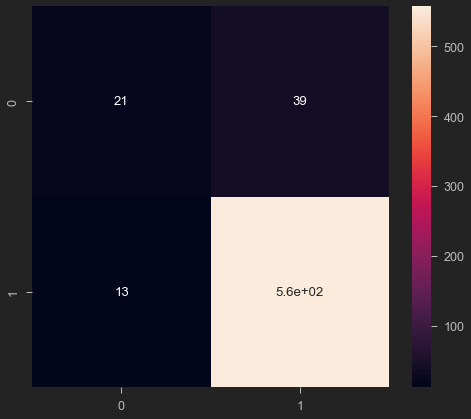

In [33]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)


In [34]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.62      0.35      0.45        60
           1       0.93      0.98      0.96       570

    accuracy                           0.92       630
   macro avg       0.78      0.66      0.70       630
weighted avg       0.90      0.92      0.91       630



#### *Logistic Regression:*

              precision    recall  f1-score   support

           0       0.84      0.35      0.49        60
           1       0.94      0.99      0.96       570

    accuracy                           0.93       630
   macro avg       0.89      0.67      0.73       630
weighted avg       0.93      0.93      0.92       630



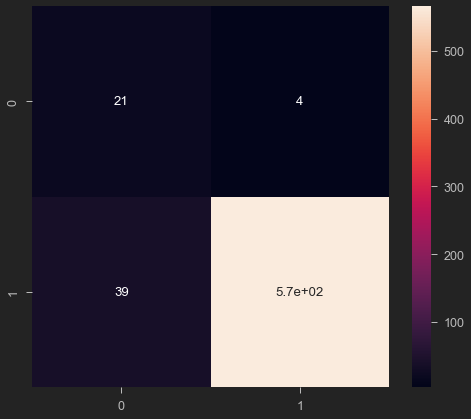

In [35]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

#### *Gradient Boosting Classifier:*

              precision    recall  f1-score   support

           0       0.67      0.13      0.22        60
           1       0.92      0.99      0.95       570

    accuracy                           0.91       630
   macro avg       0.79      0.56      0.59       630
weighted avg       0.89      0.91      0.88       630



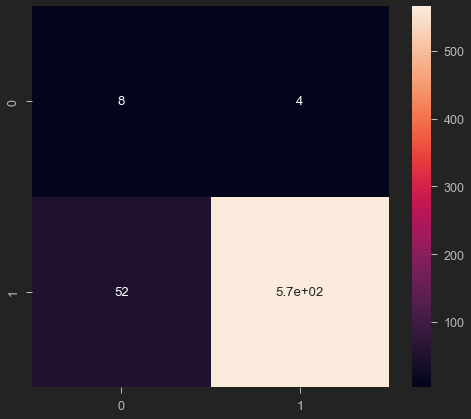

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))